In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

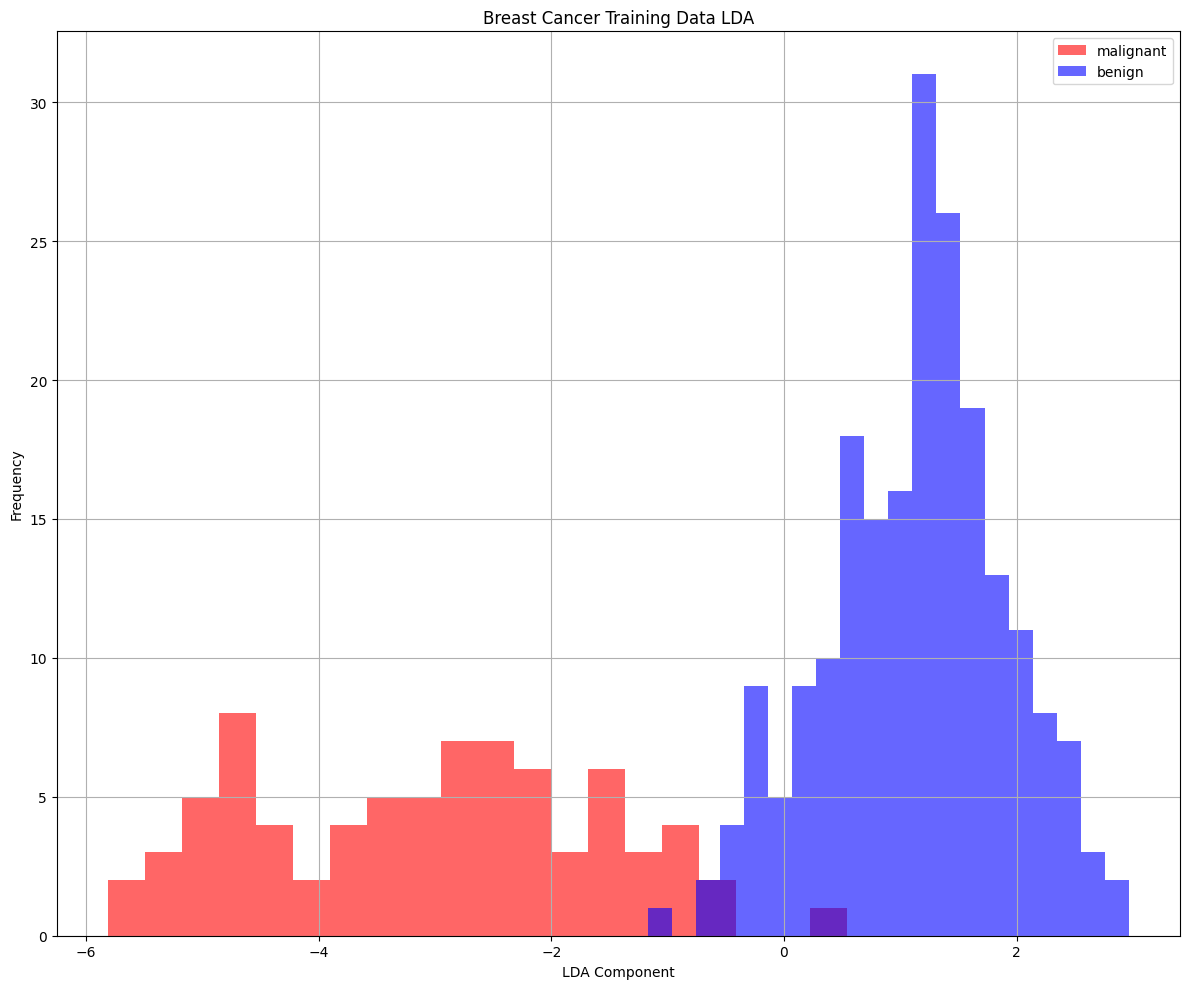

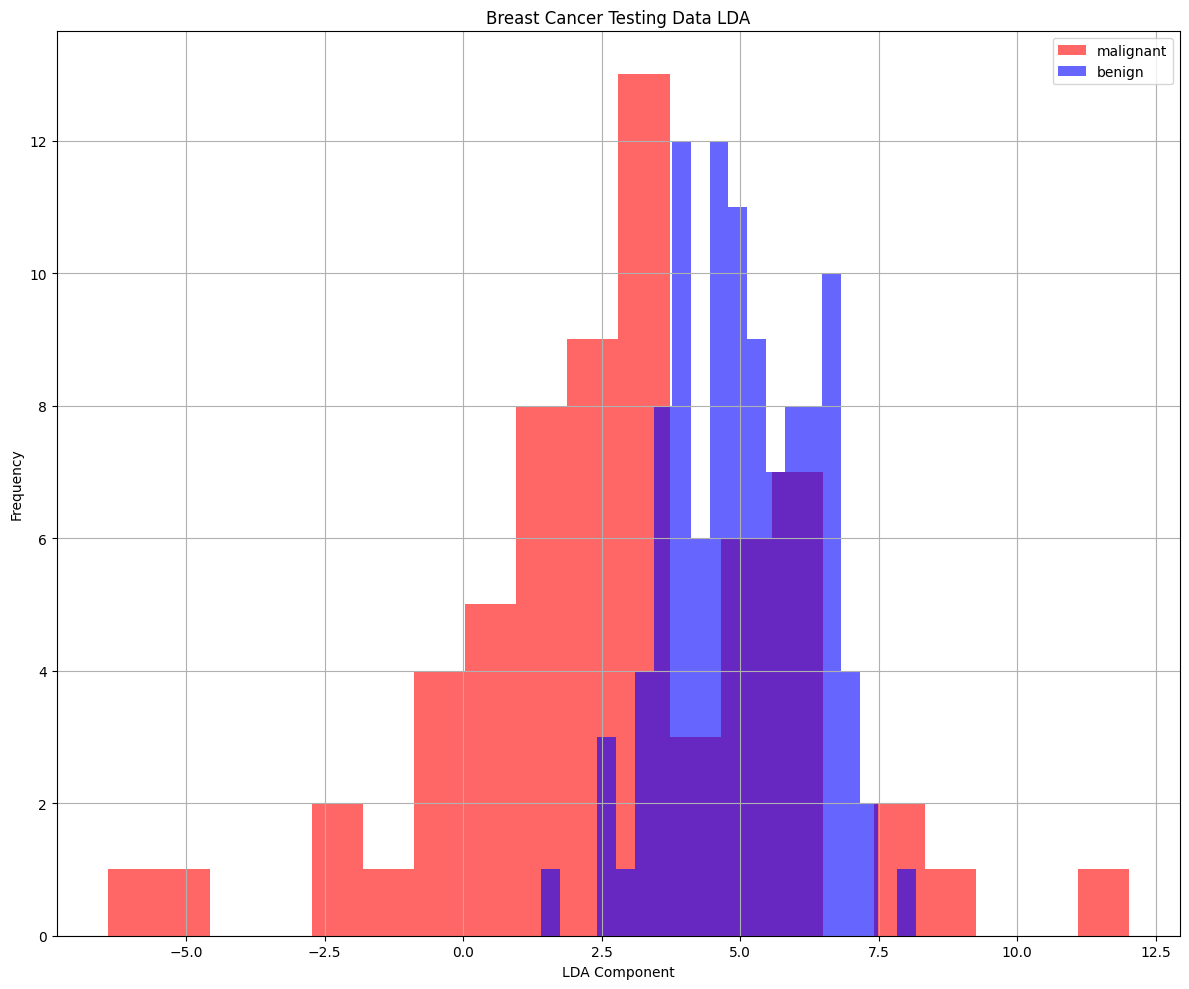

[I 2025-04-27 10:30:33,043] A new study created in memory with name: no-name-efb741d7-7e4f-40c4-bffc-4b5fdf5bc9c6
[I 2025-04-27 10:30:33,647] Trial 0 finished with value: 0.9859649122807017 and parameters: {'n_estimators': 127, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9859649122807017.
[I 2025-04-27 10:30:34,681] Trial 1 finished with value: 0.9860254083484573 and parameters: {'n_estimators': 252, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.9860254083484573.
[I 2025-04-27 10:30:38,456] Trial 2 finished with value: 0.9860859044162129 and parameters: {'n_estimators': 995, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.9860859044162129.
[I 2025-04-27 10:30:42,019] Trial 3 finished with value: 0.9860254083484573 and parameters: {'n_estimators': 895, 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 2 with valu

Best trial:
Accuracy: 0.9895946763460376
Best hyperparameters:  {'n_estimators': 102, 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 5}


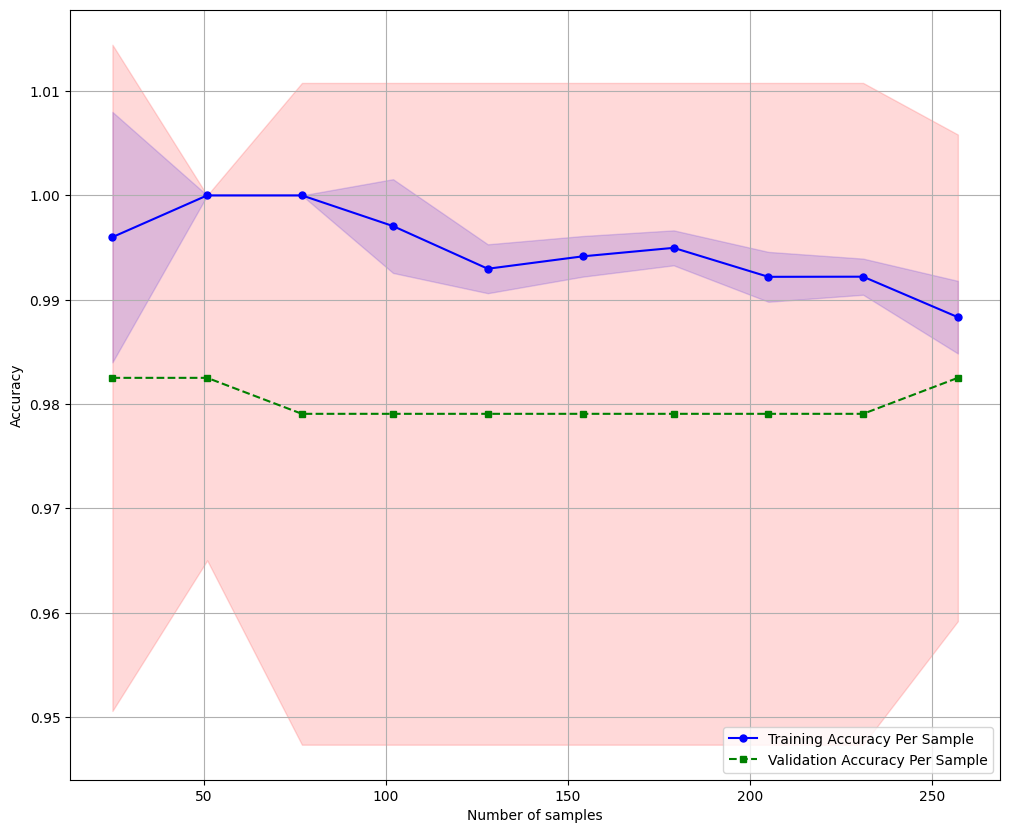

Confusion Matrix
[[  6  58]
 [  0 107]]
Accuracy: 0.6608, Precision: 0.6485, Recall: 1.0000, F1: 0.7868, AUC: 0.5625


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)